<a href="https://colab.research.google.com/github/CaioPereira51/analitics-com-python/blob/main/CaioPereira_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>FUMEC - Analytics com Python</font>
## **Trabalho Autoinstrucional**

## Objetivo
Pesquisar cases (estudos de casos, exemplos) na web de soluções de analytics e machine  learning em python, ilustrando problemas de classificação, regressão, associação, dentre outros.

## Atividades

* Pesquisar soluções de analytics, machine learning, automated machine learning, deep learning disponíveis em python que usem as bibliotecas numpy, pandas, scikit-learn, tensorflow, seaborn, matplotlib etc.

## **Regressão da árvore de decisão com múltiplas saídas**

Um exemplo para ilustrar a regressão multi-output com árvore de decisão.

As árvores de decisão são usadas para prever simultaneamente as observações ruidosas x e y de um círculo, dada uma única característica subjacente. Como resultado, aprende regressões lineares locais aproximando-se do círculo.

Podemos ver que se a profundidade máxima da árvore (controlada pelo max_depthparâmetro) for definida muito alta, as árvores de decisão aprendem detalhes muito finos dos dados de treinamento e aprendem com o ruído, ou seja, elas se ajustam demais.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

Este código demonstra regressão de árvore de decisão multi-saída usando a classe DecisionTreeRegressor da biblioteca scikit-learn.
Ele gera um conjunto de dados aleatório, ajusta três regressores de árvore de decisão com diferentes valores de max_depth e plota os resultados.

1 - Cria um conjunto de dados aleatório

In [2]:
rng = np.random.RandomState(1)  # Define uma semente aleatória para reprodutibilidade
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)  # Gera características de entrada aleatórias (X)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T  # Gera valores-alvo aleatórios (y)
# Adiciona algum ruído aos valores-alvo
y[::5, :] += 0.5 - rng.rand(20, 2)

2 - Ajusta os modelos de regressão

In [3]:
regr_1 = DecisionTreeRegressor(max_depth=2)  # Cria um regressor de árvore de decisão com max_depth = 2
regr_2 = DecisionTreeRegressor(max_depth=5)  # Cria um regressor de árvore de decisão com max_depth = 5
regr_3 = DecisionTreeRegressor(max_depth=8)  # Cria um regressor de árvore de decisão com max_depth = 8
regr_1.fit(X, y)  # Ajusta o primeiro regressor aos dados de treinamento
regr_2.fit(X, y)  # Ajusta o segundo regressor aos dados de treinamento
regr_3.fit(X, y)  # Ajusta o terceiro regressor aos dados de treinamento

DecisionTreeRegressor(max_depth=8)

3 - Preve

In [4]:
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]  # Cria um conjunto de dados de entrada de teste
y_1 = regr_1.predict(X_test)  # Prever os valores-alvo usando o primeiro regressor
y_2 = regr_2.predict(X_test)  # Prever os valores-alvo usando o segundo regressor
y_3 = regr_3.predict(X_test)  # Prever os valores-alvo usando o terceiro regressor

4 - Plota os resultados

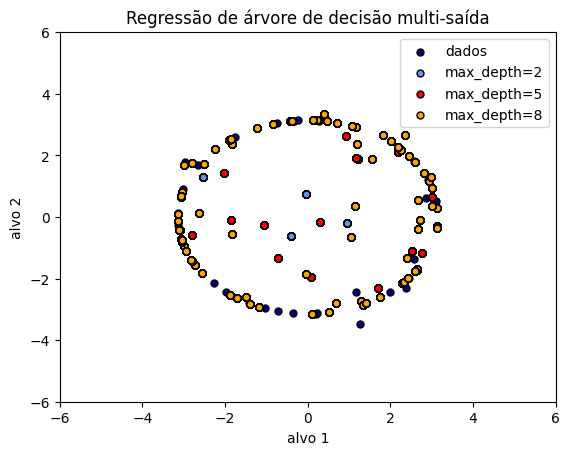

In [5]:
plt.figure()  # Cria uma nova figura
s = 25  # Define o tamanho dos pontos de dados
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="dados")  # Plote os dados originais
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, edgecolor="black", label="max_depth=2")  # Plote as previsões do primeiro regressor
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")  # Plote as previsões do segundo regressor
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8")  # Plote as previsões do terceiro regressor
plt.xlim([-6, 6])  # Define os limites do eixo x
plt.ylim([-6, 6])  # Define os limites do eixo y
plt.xlabel("alvo 1")  # Rotula o eixo x
plt.ylabel("alvo 2")  # Rotula o eixo y
plt.title("Regressão de árvore de decisão multi-saída")  # Define o título do gráfico
plt.legend(loc="best")  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico